In [1]:
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
#read data
cod_data = pd.read_csv("Cod_cwl_data.csv")

C:\Users\cay10\AppData\Local\Temp\ipykernel_976\313699122.py:2: DtypeWarning: Columns (1,32,34,35,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  cod_data = pd.read_csv("Cod_cwl_data.csv")


In [3]:
# get the data point size
len(cod_data)

18552

In [4]:
# data point labels
cod_data.columns

Index(['Unnamed: 0', 'match id', 'series id', 'end time', 'duration (s)',
       'mode', 'map', 'team', 'player', 'win?', 'score', 'kills', 'deaths',
       '+/-', 'k/d', 'kills per 10min', 'deaths per 10min', 'player score',
       'player spm', 'damage dealt', 'ekia', 'assists', 'headshots',
       'suicides', 'team kills', 'team deaths', 'kills (stayed alive)', 'hits',
       'shots', 'accuracy (%)', 'num lives', 'time alive (s)',
       'avg time per life (s)', 'fave weapon', 'fave specialist',
       'fave scorestreaks', 'hill time (s)', 'hill captures', 'hill defends',
       'snd rounds', 'snd firstbloods', 'snd firstdeaths', 'snd survives',
       'bomb pickups', 'bomb plants', 'bomb defuses', 'bomb sneak defuses',
       'snd 1-kill round', 'snd 2-kill round', 'snd 3-kill round',
       'snd 4-kill round', 'ctrl rounds', 'ctrl firstbloods',
       'ctrl firstdeaths', 'ctrl captures', '2-piece', '3-piece', '4-piece',
       '4-streak', '5-streak', '6-streak', '7-streak', '8+-st

In [5]:
#data point count
len(cod_data.columns)

76

In [6]:
# avg duration of a COD game
avg_dur = sum(cod_data['duration (s)'])/len(cod_data)/60
avg_dur

11.14779179243927

In [7]:
# diplay cod_data frame info
cod_data

,Unnamed: 0,match id,series id,end time,duration (s),mode,map,team,player,win?,...,ctf returns,ctf pickups,ctf defends,ctf kill carriers,ctf flag carry time (s),scorestreaks earned,scorestreaks used,scorestreaks deployed,scorestreaks kills,scorestreaks assists
0,0,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Denz,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Seany,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Tommey,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Wuskin,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Zed,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18547,2147,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Splyce,Tommey,L,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18548,2148,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Team Kaliber,Accuracy,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18549,2149,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Team Kaliber,Chino,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18550,2150,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Team Kaliber,Kenny,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
def plot_missing(df, cmap='Blues'):
    """Plot missing percentage of dataset.

    Args:
        df (pd.DataFrame): input dataset.
    """
    assert isinstance(df, pd.DataFrame)

    missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})
    missing_data = missing_data[missing_data['total_missing'] != 0]
    missing_data = missing_data.sort_values(by='total_missing')
    ax = sns.barplot(data=missing_data, y=missing_data.index, x='perc_missing', palette=cmap)
    plt.xlabel("Missing percentage (%)")
    plt.ylabel("Properties")

    return

### Missing data

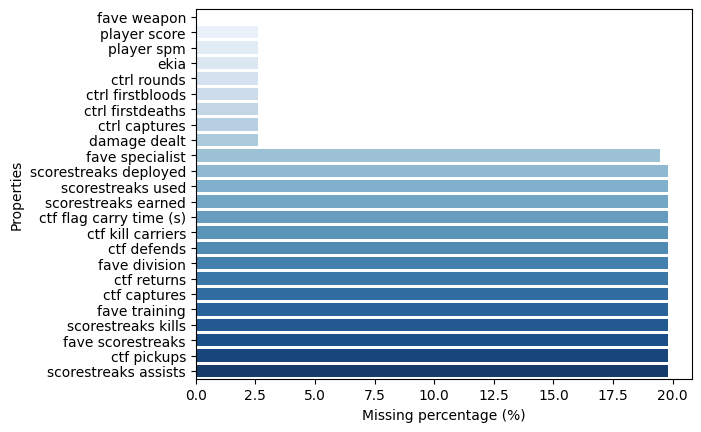

In [9]:
plot_missing(cod_data)

### Observe Player Kills and Death Counts

Text(0.5, 0, 'Kills')

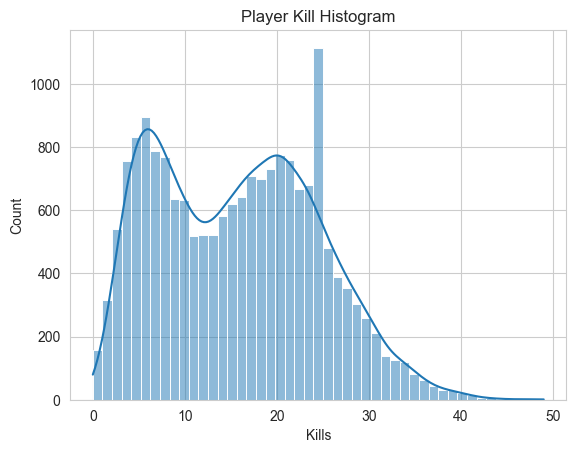

In [10]:
#player kills (counts of number of kills from data)
sns.set_style("whitegrid")
kills_plot = sns.histplot(data= cod_data, x = 'kills', kde = True)
kills_plot.set_title("Player Kill Histogram")
kills_plot.set_ylabel("Count")
kills_plot.set_xlabel("Kills")

Text(0.5, 0, 'Deaths')

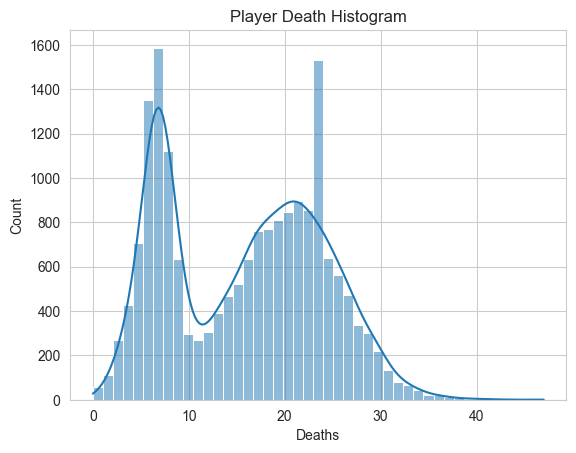

In [11]:
#player deaths (counts of number of deaths from data)
sns.set_style("whitegrid")
death_plot = sns.histplot(data= cod_data, x = 'deaths', kde = True)
death_plot.set_title("Player Death Histogram")
death_plot.set_ylabel("Count")
death_plot.set_xlabel("Deaths")

## Player Score Distribution

Text(0.5, 0, 'Player Score')

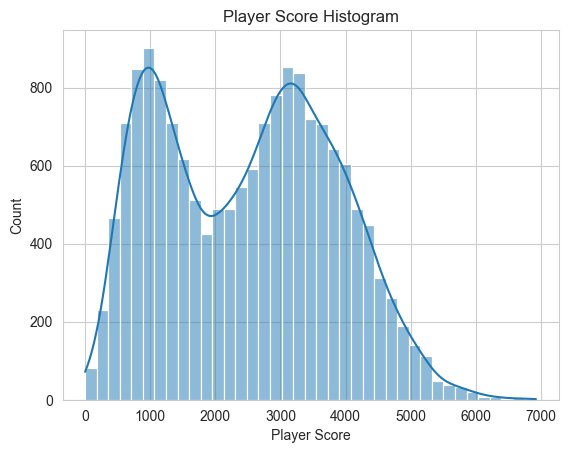

In [12]:
#player deaths (counts of number of deaths from data)
sns.set_style("whitegrid")
p_score_plot = sns.histplot(data= cod_data, x = 'player score', kde = True)
p_score_plot.set_title("Player Score Histogram")
p_score_plot.set_ylabel("Count")
p_score_plot.set_xlabel("Player Score")

## Headshot Kills vs Kill-Death Count

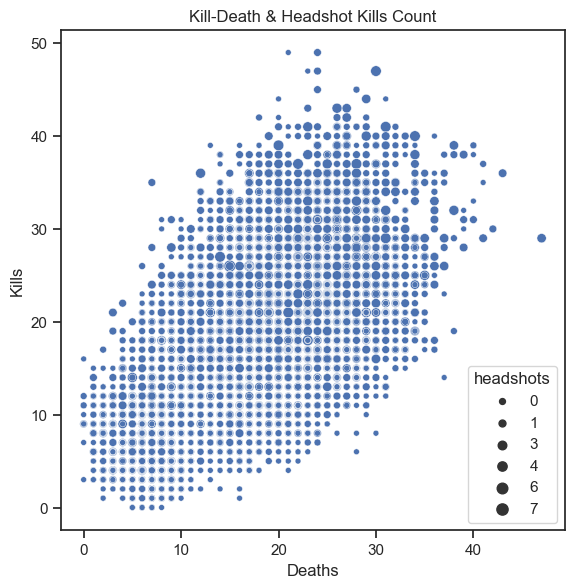

In [13]:
sns.set(rc={"figure.figsize":(6.5, 6.5)})
sns.set_style("ticks")
hvk_plot = sns.scatterplot(x=cod_data['deaths'],y=cod_data['kills'], size =cod_data['headshots'])
hvk_plot.set_title("Kill-Death & Headshot Kills Count")
hvk_plot.set_ylabel("Kills")
hvk_plot.set_xlabel("Deaths")
sns.move_legend(hvk_plot,"lower right")

## Scorestreak Kills vs Kill-Death Counts

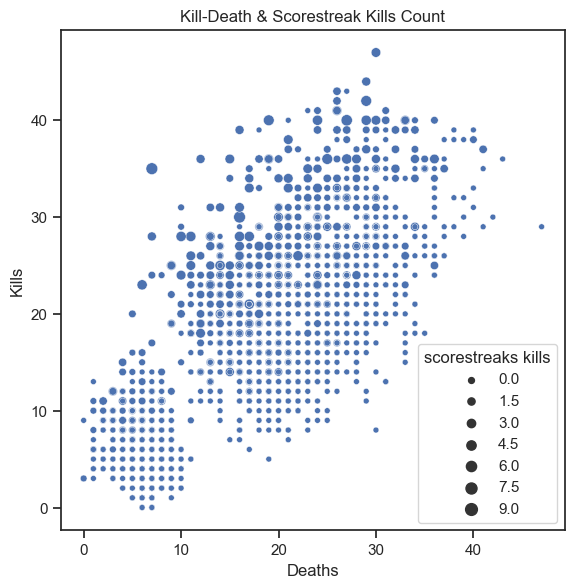

In [14]:
sns.set(rc={"figure.figsize":(6.5, 6.5)})
sns.set_style("ticks")
svk_plot = sns.scatterplot(x=cod_data['deaths'],y=cod_data['kills'], size =cod_data['scorestreaks kills'])
svk_plot.set_title("Kill-Death & Scorestreak Kills Count")
svk_plot.set_ylabel("Kills")
svk_plot.set_xlabel("Deaths")
sns.move_legend(svk_plot,"lower right")

## Overall K/D Distribution

Text(0.5, 0, 'K/D')

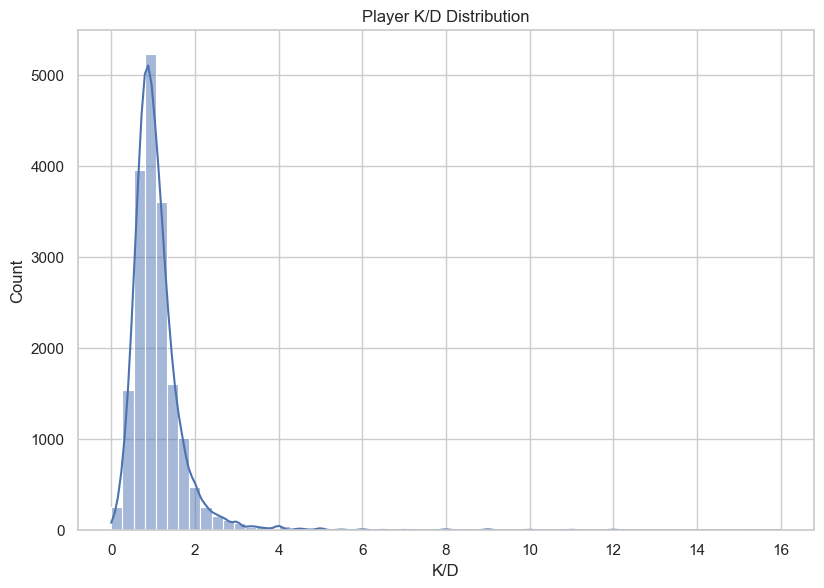

In [15]:
sns.set(rc={"figure.figsize":(9.5, 6.5)})
sns.set_style("whitegrid")
kd_plot = sns.histplot(data= cod_data, x = 'k/d', kde = True, bins=60)
kd_plot.set_title("Player K/D Distribution")
kd_plot.set_ylabel("Count")
kd_plot.set_xlabel("K/D")

## Headshot vs Scorestreak

## Player Score vs K/D Ratio

Text(0.5, 1.0, 'K/D Ratio vs Player Score')

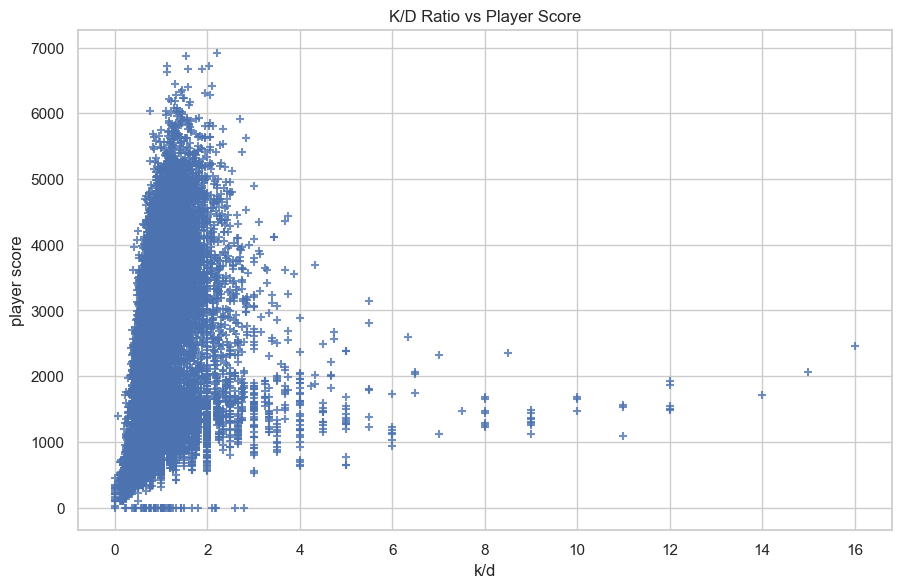

In [16]:
sns.set(rc={"figure.figsize":(10.5, 6.5)})
sns.set_style("whitegrid")
sns.regplot(x=cod_data['k/d'],y=cod_data['player score'], marker="+", fit_reg=False).set_title("K/D Ratio vs Player Score")

## Most Common Weapons Used

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Maddox RFB'),
  Text(1, 0, 'Saug 9mm'),
  Text(2, 0, 'ICR-7'),
  Text(3, 0, 'PPSh-41'),
  Text(4, 0, 'FG 42'),
  Text(5, 0, 'Paladin HB50'),
  Text(6, 0, 'KN-57'),
  Text(7, 0, 'Kar98k'),
  Text(8, 0, 'Rampart 17'),
  Text(9, 0, 'SwordFish'),
  Text(10, 0, 'BAR'),
  Text(11, 0, 'Spitfire'),
  Text(12, 0, 'GKS'),
  Text(13, 0, 'Grav'),
  Text(14, 0, 'Auger DMR'),
  Text(15, 0, 'Outlaw 308')])

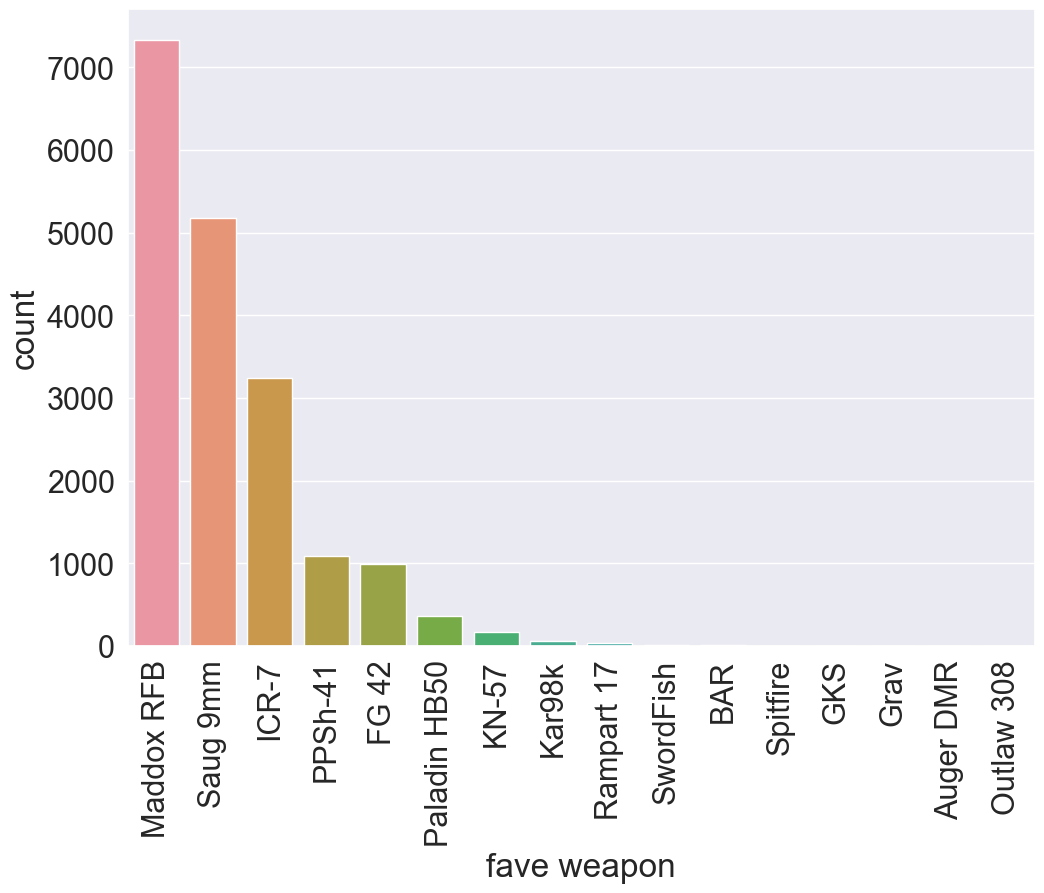

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2)
sns.countplot(x=cod_data['fave weapon'], order = cod_data['fave weapon'].value_counts().index)
plt.xticks(rotation=90)

## Top 8 Most Used Weapons Compared

C:\Users\cay10\AppData\Local\Temp\ipykernel_976\828643575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cod_data[cod_data['fave weapon']=='Maddox RFB']['kills'],hist=False, label='Maddox RFB')
C:\Users\cay10\AppData\Local\Temp\ipykernel_976\828643575.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

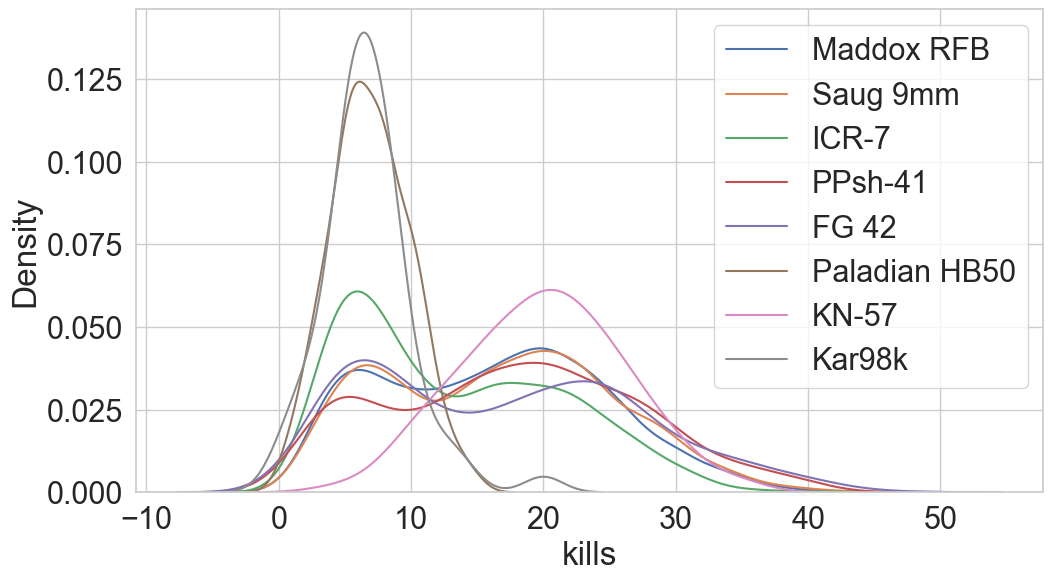

In [18]:
sns.set(rc={'figure.figsize':(11.7,6.27)}, font_scale=2)
sns.set_style("whitegrid")
sns.distplot(cod_data[cod_data['fave weapon']=='Maddox RFB']['kills'],hist=False, label='Maddox RFB')
sns.distplot(cod_data[cod_data['fave weapon']=='Saug 9mm']['kills'],hist=False, label='Saug 9mm')
sns.distplot(cod_data[cod_data['fave weapon']=='ICR-7']['kills'],hist=False, label='ICR-7')
sns.distplot(cod_data[cod_data['fave weapon']=='PPSh-41']['kills'],hist=False, label='PPsh-41')
sns.distplot(cod_data[cod_data['fave weapon']=='FG 42']['kills'],hist=False, label='FG 42')
sns.distplot(cod_data[cod_data['fave weapon']=='Paladin HB50']['kills'],hist=False, label='Paladian HB50')
sns.distplot(cod_data[cod_data['fave weapon']=='KN-57']['kills'],hist=False, label='KN-57')
sns.distplot(cod_data[cod_data['fave weapon']=='Kar98k']['kills'],hist=False, label='Kar98k')

plt.legend()

## Weapons Exhibiting Similar Distributions

C:\Users\cay10\AppData\Local\Temp\ipykernel_976\3148930079.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cod_data[cod_data['fave weapon']=='Maddox RFB']['kills'],hist=False, label='Maddox RFB')
C:\Users\cay10\AppData\Local\Temp\ipykernel_976\3148930079.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

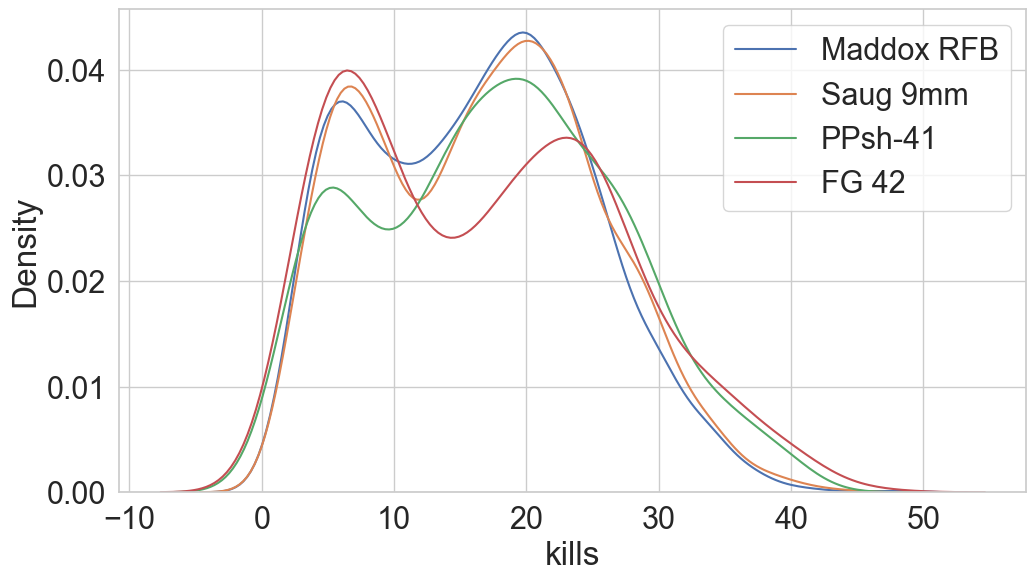

In [19]:
sns.set(rc={'figure.figsize':(11.7,6.27)}, font_scale=2)
sns.set_style("whitegrid")
sns.distplot(cod_data[cod_data['fave weapon']=='Maddox RFB']['kills'],hist=False, label='Maddox RFB')
sns.distplot(cod_data[cod_data['fave weapon']=='Saug 9mm']['kills'],hist=False, label='Saug 9mm')
sns.distplot(cod_data[cod_data['fave weapon']=='PPSh-41']['kills'],hist=False, label='PPsh-41')
sns.distplot(cod_data[cod_data['fave weapon']=='FG 42']['kills'],hist=False, label='FG 42')

plt.legend()

## Weapons Displaying Different Trends

C:\Users\cay10\AppData\Local\Temp\ipykernel_976\1073186485.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cod_data[cod_data['fave weapon']=='ICR-7']['kills'],hist=False, label='ICR-7')
C:\Users\cay10\AppData\Local\Temp\ipykernel_976\1073186485.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

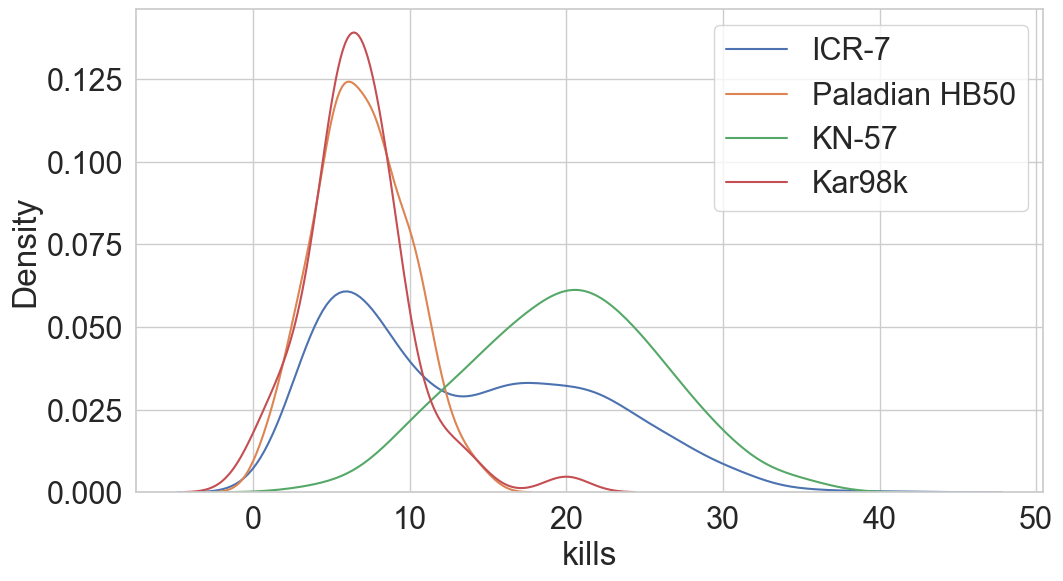

In [20]:
sns.set(rc={'figure.figsize':(11.7,6.27)}, font_scale=2)
sns.set_style("whitegrid")
sns.distplot(cod_data[cod_data['fave weapon']=='ICR-7']['kills'],hist=False, label='ICR-7')
sns.distplot(cod_data[cod_data['fave weapon']=='Paladin HB50']['kills'],hist=False, label='Paladian HB50')
sns.distplot(cod_data[cod_data['fave weapon']=='KN-57']['kills'],hist=False, label='KN-57')
sns.distplot(cod_data[cod_data['fave weapon']=='Kar98k']['kills'],hist=False, label='Kar98k')

plt.legend()

## Weapon Popularity vs Game Modes

In [21]:
def plot_heatmap(df, x, y, norm='columns', annot=True, cmap='Blues'):
    """Plot heatmap of two properties.

    Args:
        df (pd.DataFrame): input dataset.
        x (str): property on x axis.
        y (str): property on y axis.
        norm (str, optional): normalization mode for pd.crosstab (‘all’, ‘index’, ‘columns’). Defaults to 'columns'.
        annot (bool, optional): Annotating values or not. Defaults to True.
        cmap (str, optional): colormap for sns.heatmap. Defaults to 'Blues'.
    """
    assert isinstance(df, pd.DataFrame)
    assert isinstance(x, str)
    assert isinstance(y, str)
    assert isinstance(norm, str) and (norm=='all' or norm=='index' or norm=='columns')
    assert isinstance(annot, bool)
    assert isinstance(cmap, str)

    sns.heatmap(pd.crosstab(df[y], df[x], normalize=norm), annot=annot, cmap=cmap)

    return

## Weapon Popularity vs Game Modes

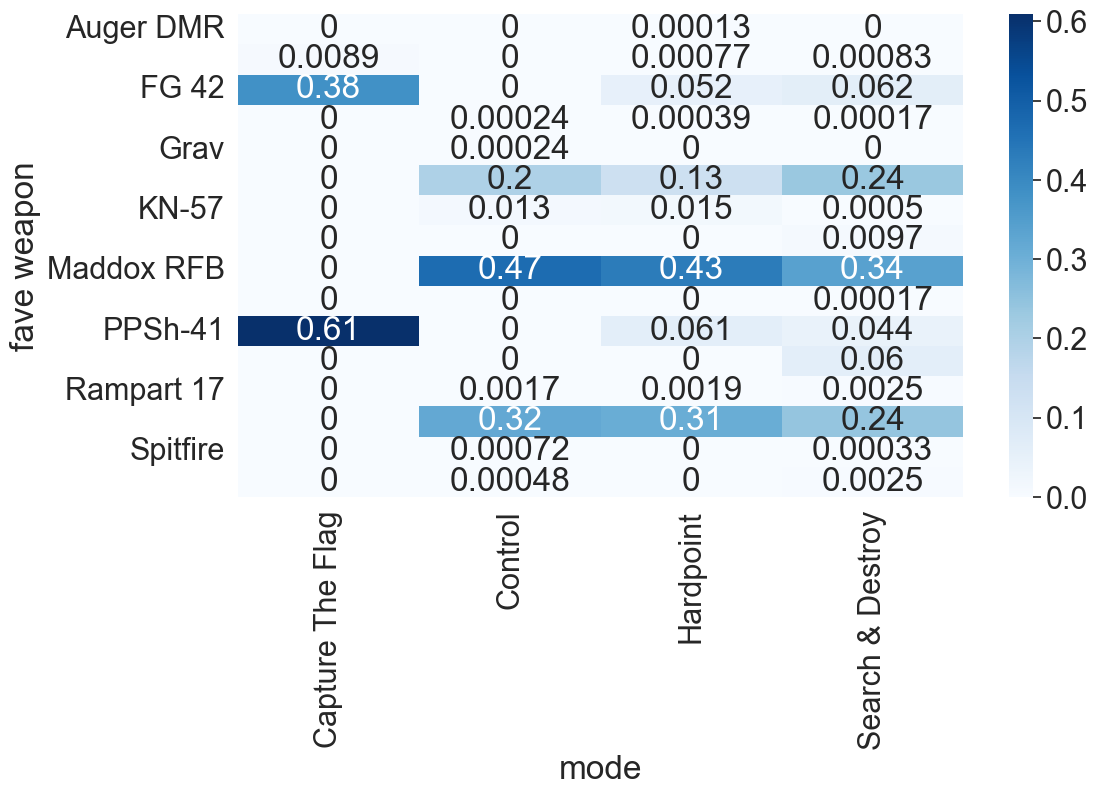

In [22]:
plot_heatmap(cod_data, 'mode', 'fave weapon')

## Weapon Popularity vs Specialists

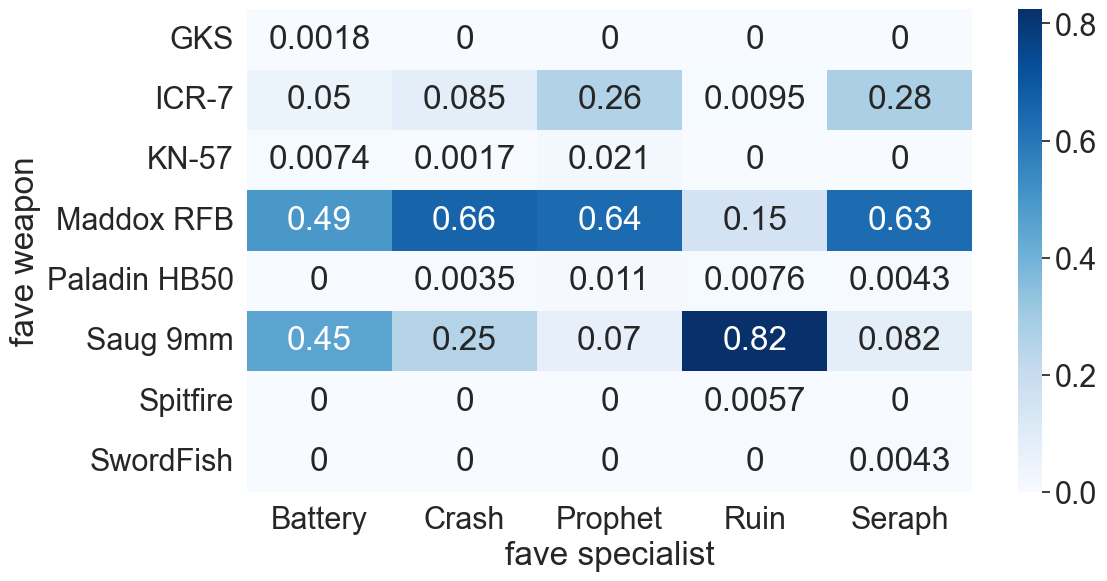

In [23]:
plot_heatmap(cod_data, 'fave specialist', 'fave weapon')